In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg as sla

def photonic1D(xmin, xmax, Nx, Vfun, neigs):   
    x = np.linspace(xmin, xmax, Nx)  # x axis grid
    dx = x[1] - x[0]  # x axis step size    # Obtain the potential function values:
    V = Vfun  # create the Hamiltonian Operator matrix:
   
    H = sparse.eye(Nx, Nx, format='lil') * (-2)    # implement the numerical derivative
    e=sparse.eye(Nx, Nx, format='lil')   # implement the numerical derivative

    for i in range(Nx - 1):
        H[i, i + 1] =  1
        H[i + 1, i] = 1
        e[i,i]*=V[i]**-1
    
    H = e@H/ (dx ** 2)

       # convert to csc sparse matrix format:
    H = H.tocsc()    # obtain neigs solutions from the sparse matrix:
    [evl, evt] = sla.eigs(H, k=neigs, which='SM')
    for i in range(neigs):
        # normalize the eigenvectors:
        evt[:, i] = evt[:, i] / np.sqrt(
                                np.trapz(np.conj(
                                evt[:,i])*evt[:,i],x))
        # eigen values MUST be real:
        evl = np.real(evl)    
     
    return evl, evt, x

In [65]:
def eval_eigenfunc(xmin, xmax, Nx, Vfun, neigs):
    # call the 1D :
    H = photonic1D(xmin, xmax, Nx, Vfun, neigs)
    evl = H[0] # energy eigenvalues
    indices = np.argsort(evl)
    print("Energy eigenvalues:")
    for i,j in enumerate(evl[indices]):
        print("{}: {:.5f}".format(i+1,j))
    evt = H[1] # eigenvectors 
    x = H[2] # x grid 
    i = 0
    plt.figure(figsize=(20,15))
    while i < neigs:
        n = indices[i]
        # obtain probabilities from wave functions
        y = np.real(np.conj(evt[:, n]) * evt[:, n])  
        plt.subplot(neigs, 1, i+1)  
        plt.plot(x, y/max(y)*max(Vfun))
        plt.plot(x, Vfun)
        plt.axis('off')
        i = i + 1  
    
    plt.show()
    

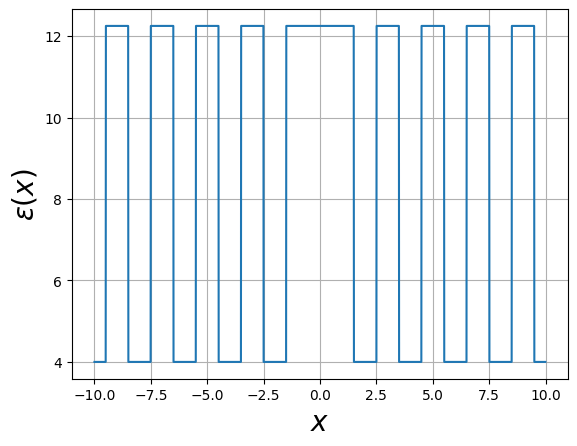

In [85]:
nx = 2048 # number of sampling points of a single unit cell
L=10 #  half of the total len of the lattic
dx = 2*L/nx # space increment
er2=4  # Dielectric value 2
er1=12.25  # Dielectric value 1
d=3
aa=1


def periodicf(lid,lfd,f,x):
    if x>=lid and x<=lfd :
        return er1
    if ((x>=lfd and x<=(lfd+2*aa)) or (x<=lid and x>=(lid-2*aa))) :
        return f(x)
    elif x>(lfd+2*aa):
        x_new=x-(2*aa)
        return periodicf(li,lf,f,x_new)
    elif x<(lid-2*aa):
        
        x_new=x+(2*aa)
        return periodicf(li,lf,f,x_new)
    
def squareP(li,lf,x):
    return periodicf(li,lf,square,x)
 
# Non-periodic square wave function defined for a range [-l,l]
def square(x):
    if abs(x)>(lf+aa):
        return er1
    else:
        return er2

li = -d/2
lf = d/2
lon=1
x_cell =np.arange(-L*lon,L*lon,dx) # spatial sampling # sampling points in the unit cell
e_cell = [squareP(li,lf,xi) for xi in x_cell]  #Dielectric function




def sho_wavefunctions_plot(xmin = -L, xmax = L, Nx = nx, 
                           neigs = 30):
    
    Vfun=np.array(e_cell)
    
    eval_eigenfunc(xmin, xmax, Nx, Vfun,neigs)

plt.plot(x_cell,e_cell)
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$\epsilon(x)$',fontsize=20)
plt.grid()

Energy eigenvalues:
1: -2.77447
2: -2.58518
3: -2.42271
4: -2.26256
5: -2.09954
6: -1.95721
7: -1.81068
8: -1.67516
9: -1.58335
10: -1.31252
11: -1.11450
12: -1.08660
13: -0.96546
14: -0.88872
15: -0.79173
16: -0.69839
17: -0.63308
18: -0.53348
19: -0.49936
20: -0.36613
21: -0.22451
22: -0.20898
23: -0.17611
24: -0.13433
25: -0.10508
26: -0.06897
27: -0.04784
28: -0.02476
29: -0.01207
30: -0.00275


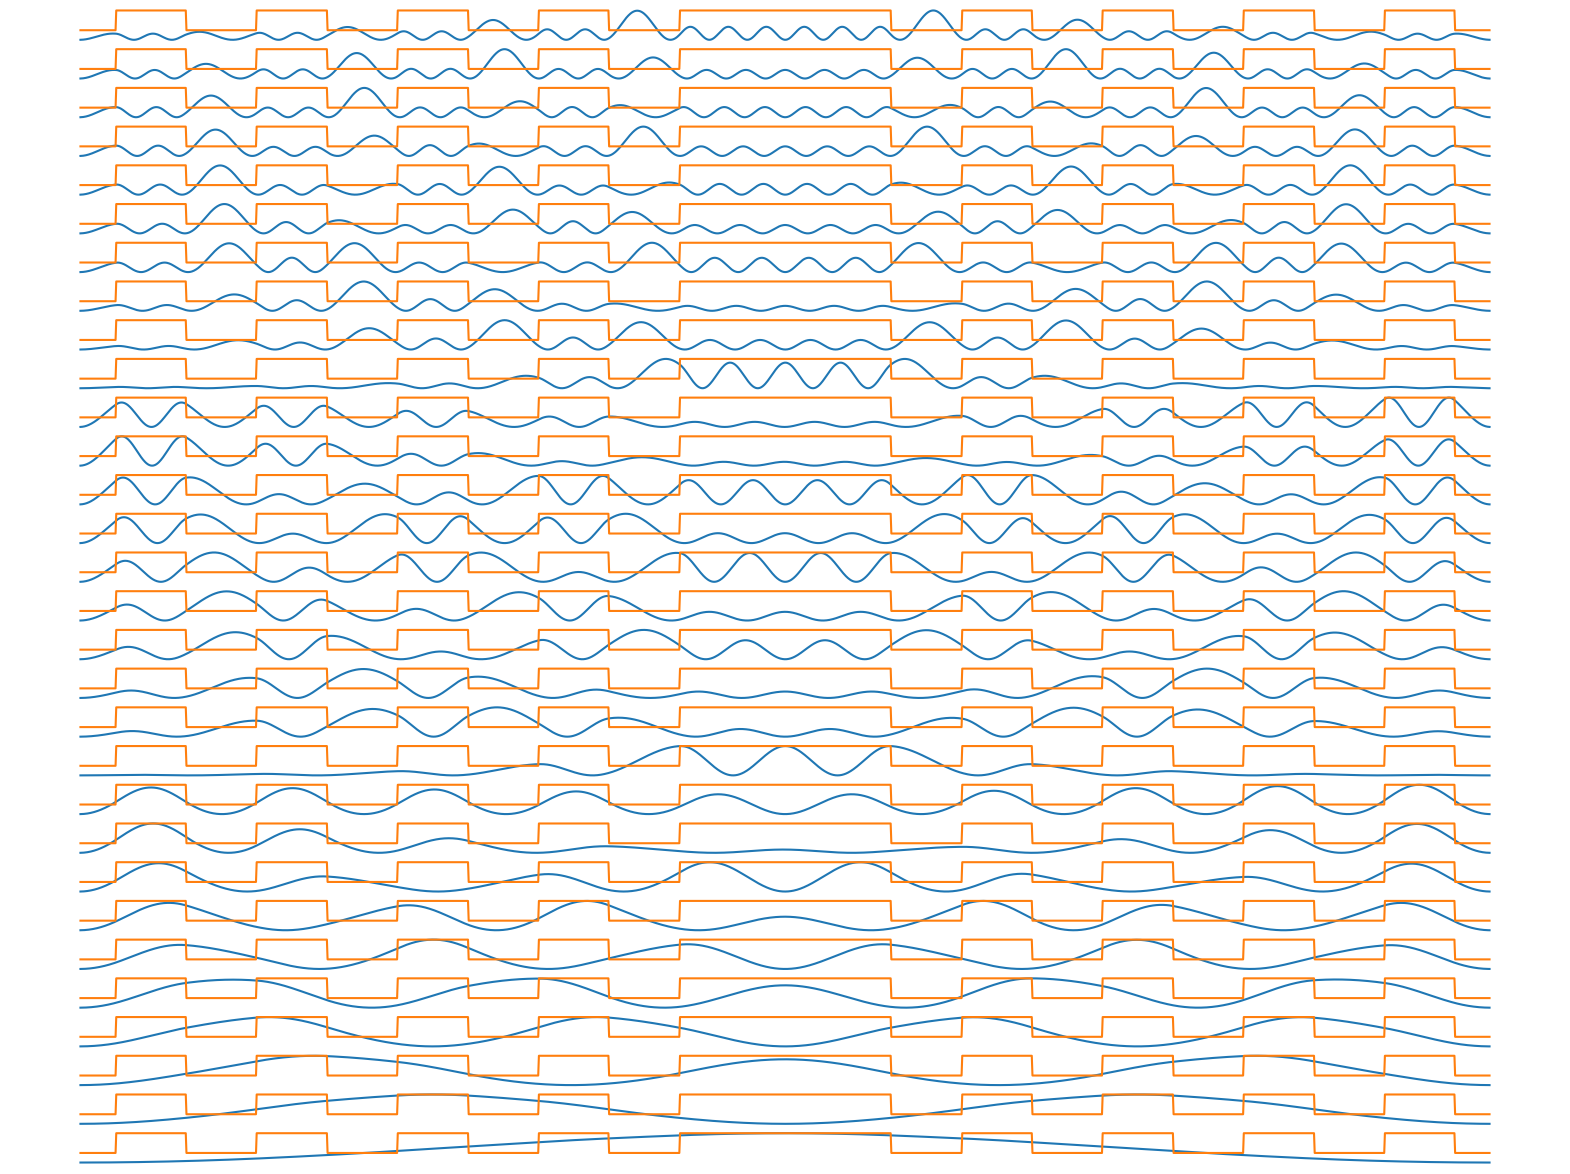

In [86]:
sho_wavefunctions_plot()